<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transformation-des-variables-qualitatives" data-toc-modified-id="Transformation-des-variables-qualitatives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transformation des variables qualitatives</a></span></li><li><span><a href="#Les-outils" data-toc-modified-id="Les-outils-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Les outils</a></span><ul class="toc-item"><li><span><a href="#Les-Régressions" data-toc-modified-id="Les-Régressions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Les Régressions</a></span></li></ul></li></ul></div>

In [1]:
import time, warnings
import os
os.chdir(r"F:\Formation\donnees")

import pandas as pd
import seaborn as sns

%pylab inline

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-poster')
sns.set(font_scale=3)
np.random.seed(123456789)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Transformation des variables qualitatives

In [2]:
def createColumnsQualitatives(donnees,col):
    var = donnees[col].unique()
    var.sort()
    for i in donnees[col].unique():
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

# Les outils

In [3]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [4]:
def getMetrics(val_reels, val_predites):
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    return sqrt(mean_squared_error(val_reels, val_predites)),sqrt(abs(r2_score(val_reels, val_predites))),correlations.astype(float).corr().valeurs[0]   

In [5]:
def affichageMetricsAvecLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    plt.figure(figsize=(26,26))
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
                s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
             (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    plt.xlabel('valeurs')
    plt.ylabel('predictions')
    plt.show()    
    
    sns.jointplot(x='valeurs',y='predictions',data=correlations, kind='reg', size=25)

In [6]:
def affichageMetricsSansLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    #print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    #print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    #plt.figure(figsize=(26,26))
    #plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    #plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
    #            s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    #plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
    #         (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    #plt.xlabel('valeurs')
    #plt.ylabel('predictions')
    #plt.show()   
    
    sns.jointplot(x='valeurs',y='predictions',
                  data=correlations.iloc[::10,:], kind='reg', size=25)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.figure(figsize=(26,26))    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     

In [8]:
def afficheDistributions(donnees):
    for i in donnees.columns:
        plt.title('distribution %s' % i)
        donnees[i].hist(figsize=(16,14),bins=50, color='navy',edgecolor='white')
        plt.show()    

## Les Régressions

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge
from sklearn.linear_model import RANSACRegressor,ARDRegression,OrthogonalMatchingPursuit
from sklearn.linear_model import SGDRegressor,TheilSenRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.neural_network import MLPRegressor

def calculRegressions(X_train, X_test, y_train, y_test):
    rmse,r,p = dict(),dict(),dict()
    
    yRegressions = pd.DataFrame()
    yRegressions['Observations']=y_test

    noms = ["LinearRegression",
            "PolynomialRegression2",
            #"PolynomialRegression3",
            #"PolynomialRegression4",
            "BayesianRidge",
            "MLPRegressor",
            "SVR_linear",
            "SVR_rbf",
            #"SVR_poly2",# "SVR_poly3","SVR_poly4",
            #"SVR_sigmoid",
            "RandomForestRegressor",
            "GradientBoostingRegressor"]

    regresseurs = [
        LinearRegression(),
        make_pipeline(PolynomialFeatures(2), Ridge()),
        BayesianRidge(alpha_1=1.0e-7),
        MLPRegressor(alpha=0.0001, hidden_layer_sizes = (100,), 
                     max_iter = 5000, 
                     activation = 'logistic',
                     learning_rate = 'adaptive'),
        SVR(kernel='linear', C=0.001),
        SVR(kernel='rbf', C=1e3, gamma=0.0001),
        RandomForestRegressor(max_depth=4, n_estimators=500),
        GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                    n_estimators=500, max_depth=3,
                                    learning_rate=.1, min_samples_leaf=9,
                                    min_samples_split=9)   ]

    for nom, reg in zip(noms, regresseurs):
        t1 = time.time()  
        yRegressions[nom] = reg.fit(X_train, y_train).predict(X_test)
        rmse[nom],r[nom],p[nom] = getMetrics(y_test, yRegressions[nom])
        print('Exécution  '+nom.ljust(30)+(': %.2fs' % (time.time() - t1)).lstrip('0')+('  p = %.12f' % p[nom]).lstrip('0'))

    resultats = pd.DataFrame(pd.Series(rmse),columns=["RMSE"])
    resultats["R"] = pd.Series(r)
    resultats["Pearson"] = pd.Series(p)
    resultats.sort_values(by='Pearson',ascending=False, inplace=True)
    return resultats,yRegressions

In [10]:
donnees = pd.read_csv('California Housing Price.csv')

In [11]:
#createColumnsQualitatives(donnees,'ocean_proximity')

In [12]:
donnees.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
donnees.shape

(20640, 10)

In [14]:
def fVarQ ( col ):
    dicoOP = { nom:i for i,nom in enumerate(col.unique())}
    dicoOPInv = { i:nom for i,nom in enumerate(col.unique())}
    col.apply(lambda x : dicoOP[x]),dicoOP,dicoOPInv

In [15]:
dicoOP = { nom:i for i,nom in enumerate(donnees.ocean_proximity.unique())}
dicoOPInv = { i:nom for i,nom in enumerate(donnees.ocean_proximity.unique())}

In [16]:
donnees.ocean_proximity = donnees.ocean_proximity.apply(lambda x : dicoOP[x])

In [17]:
dicoOPInv

{0: 'NEAR BAY', 1: '<1H OCEAN', 2: 'INLAND', 3: 'NEAR OCEAN', 4: 'ISLAND'}

In [18]:
donnees.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [19]:
donnees.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
donnees.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

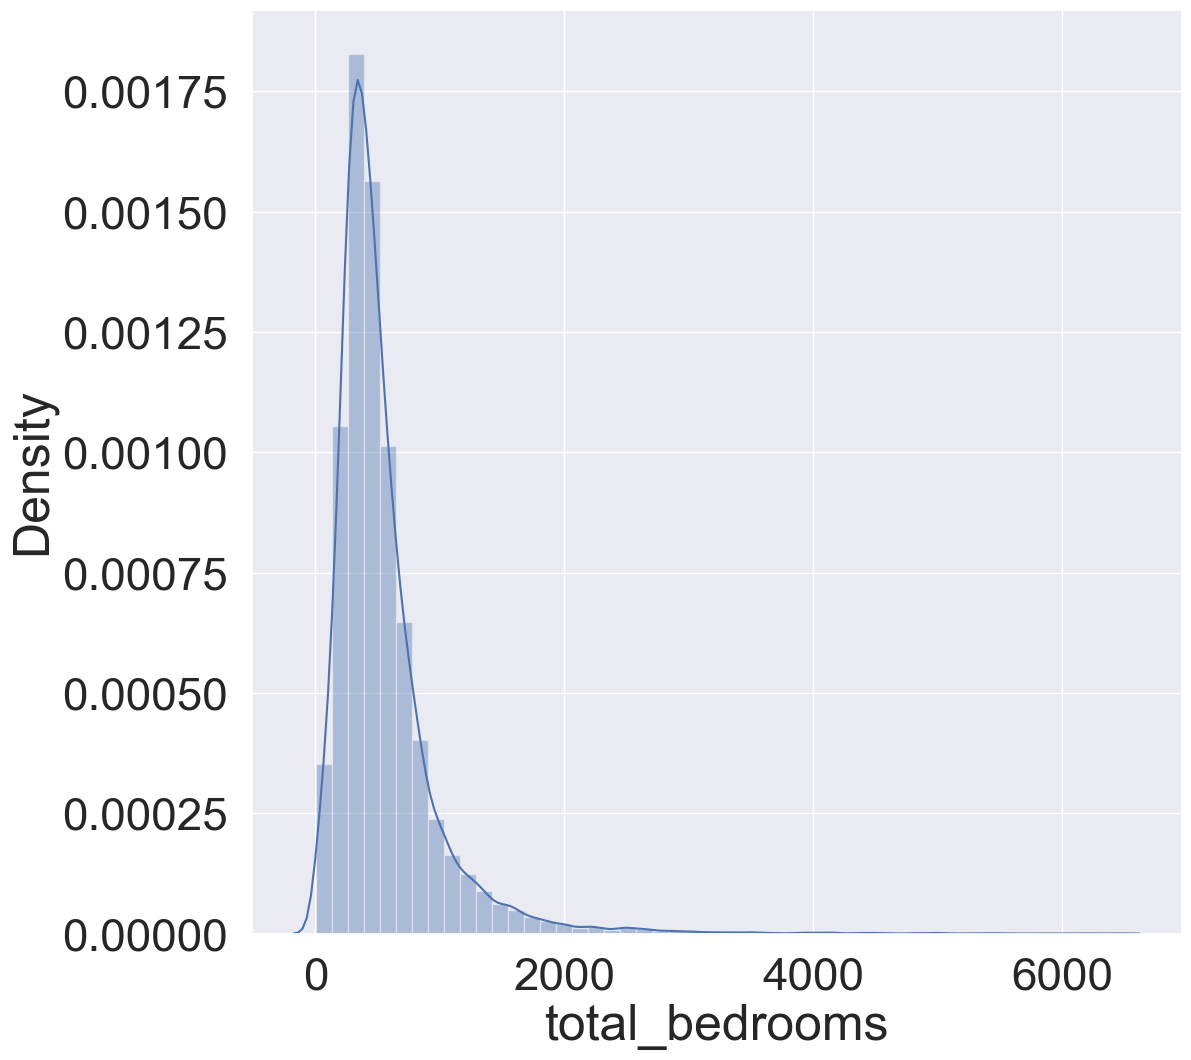

In [21]:
plt.figure(figsize=(12,12))
sns.distplot(donnees[(~donnees.total_bedrooms.isna())]['total_bedrooms']);
#sns.distplot(donnees[(donnees.total_bedrooms.isna())]['total_rooms']);

In [22]:
donnees[['total_rooms','total_bedrooms', 'households','population']].corr()

,total_rooms,total_bedrooms,households,population
total_rooms,1.000000,0.930380,0.918484,0.857126
total_bedrooms,0.930380,1.000000,0.979728,0.877747
households,0.918484,0.979728,1.000000,0.907222
population,0.857126,0.877747,0.907222,1.000000


In [23]:
donnees.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004081,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


In [27]:
X = donnees[~donnees.total_bedrooms.isna()][['total_rooms','households','population']]
y = donnees[~donnees.total_bedrooms.isna()]['total_rooms']

In [28]:
X.head()

,total_rooms,households,population
0,880.0,126.0,322.0
1,7099.0,1138.0,2401.0
2,1467.0,177.0,496.0
3,1274.0,219.0,558.0
4,1627.0,259.0,565.0


In [29]:
y

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20433, dtype: float64